## Studying TimeSeries following [course](https://www.youtube.com/watch?v=k9jOeUKRGSs&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO)

- [ ] Time Series Theory - 
- [ ] Hands on Analysis- 

### Plots:

- [ ] QQ-Plot
- [ ] ACF
- [ ] PACF
- [ ] Season Decomposition graph

### Dickey -Fuller Test

What it is? and why rely when examing timeseries data

- [ ] Data preprocessing

# ☹️ 😐 🙂 😀

# ⌛Time Series Data⌛

 A sequence of information which attaches a <strong>time-period</strong> to each value (anything  measuable and depends on time - ex: prices, humidity or number of people). 
 The time span isn't limited to a total time, it can be seconds, days, decades or century. It must have a starting and an ending.
 
 how often values od the data set are recorded = frequency
  
### Analyzing time-periods:

All time-periods must be <strong>EQUAL AND CLEARLY DEFINED</strong>, which would result in a CONSTANT ' frequency"

Patterns observed in time-series are expected to persist in the funture.

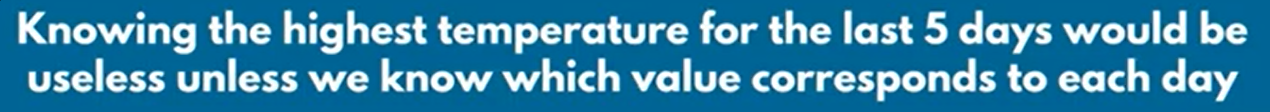


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab

import warnings
warnings.filterwarnings("ignore")

## Importing the Data😊

dataset [here](https://www.kaggle.com/datasets/regaipkurt/financial-markets/code?datasetId=785788)

This dataset contains stock prices of Financial Times Stock Exchange: 
- S&P 500 -`spx` (USA), 
- DAX 30 - `dax` (German), 
- FTSE 100 - `ftse` (London-UK), 
-and NIKKEI 225 - `nikkei`(Japan)

Content: Stock Exchange values between 1994 and 2018

number after each is the number of companies.

In [2]:
archive_path = 'Index2018.csv'
raw_csv_data = pd.read_csv(archive_path)
df_comp = raw_csv_data.copy() #we will use this 

## Examing the Data

In [3]:
# take a look in the 5 first rows
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_comp.describe()
# date is not included because is not numeric

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

- first line: Count - same numbers as expected
- The average of the "spx" is a lot lower than the other values
- the maximum value of the "spx" is lower than the min value of the "ftse" and "nikkei"
- the values of 'dax' and 'ftse' are similar

In [6]:
df_comp.describe().T.style.format('{:,.2f}')\
                                    .background_gradient(subset=['mean','std','min'],cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
spx,"6,269.00","1,288.13",487.59,438.92,990.67,"1,233.42","1,459.99","2,872.87"
dax,"6,269.00","6,080.06","2,754.36","1,911.70","4,069.35","5,773.34","7,443.07","13,559.60"
ftse,"6,269.00","5,422.71","1,145.57","2,876.60","4,486.10","5,662.43","6,304.25","7,778.64"
nikkei,"6,269.00","14,597.06","4,043.12","7,054.98","10,709.29","15,028.17","17,860.47","24,124.15"


In [7]:
# verifying if there are nan
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [8]:
# selecting only one of the columns, like spx:
df_comp.spx.isna().sum()

0

### Plotting Data

In [9]:
import matplotlib.pyplot as plt

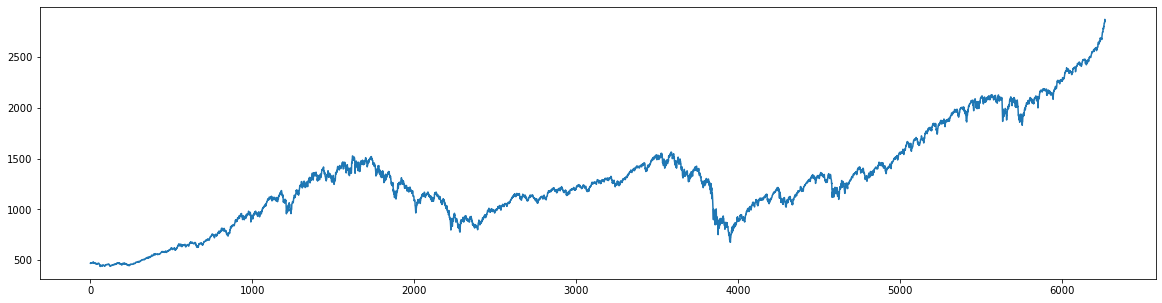

In [10]:
df_comp.spx.plot(figsize=(20,5));

In [11]:
# to plot the graphic is better to set the date as index, see de differences in the axes X.
df_comp.set_index('date',inplace=True)

In [12]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
07/01/1994,469.90,2224.95,3445.98,18124.01
10/01/1994,475.27,2225.00,3440.58,18443.44
11/01/1994,474.13,2228.10,3413.77,18485.25
12/01/1994,474.17,2182.06,3372.02,18793.88
13/01/1994,472.47,2142.37,3360.01,18577.26


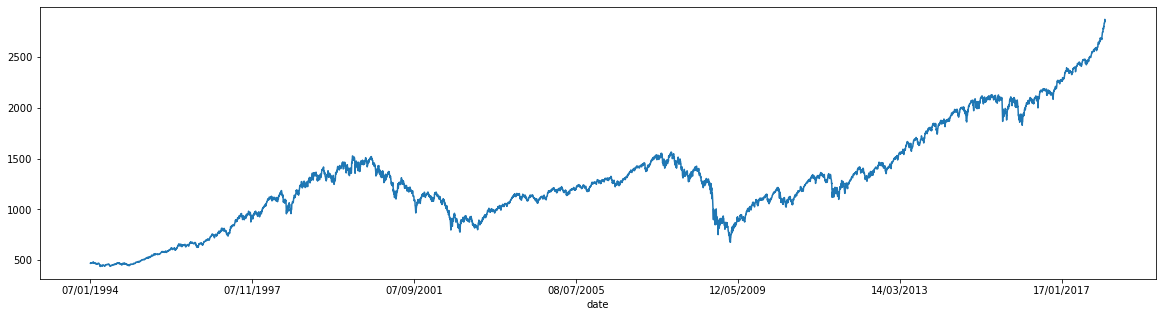

In [13]:
df_comp.spx.plot(figsize=(20,5));

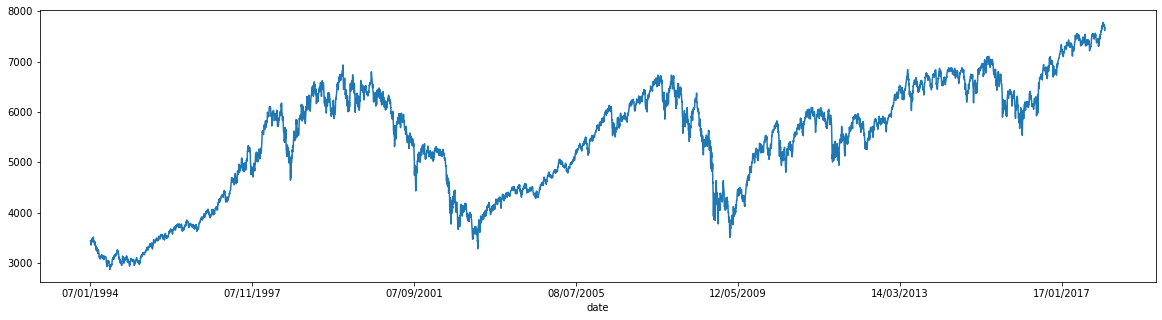

In [14]:
df_comp.ftse.plot(figsize=(20,5));

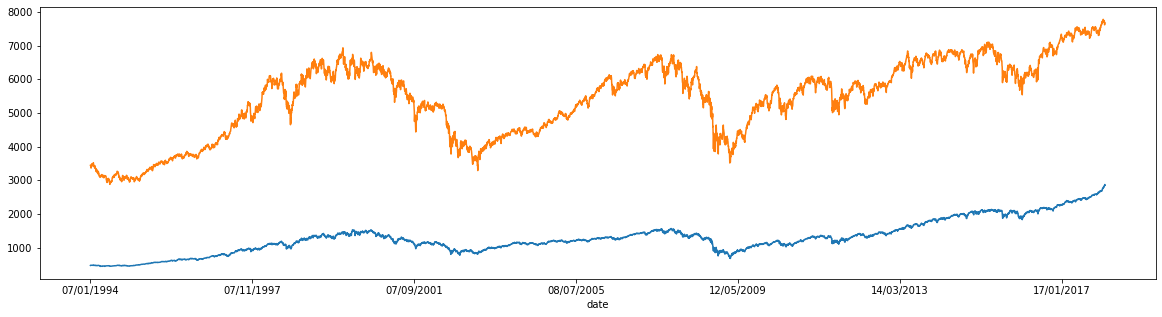

In [15]:
# to compare both we can put both in the same graphic 
df_comp.spx.plot(figsize=(20,5))
df_comp.ftse.plot(figsize=(20,5));

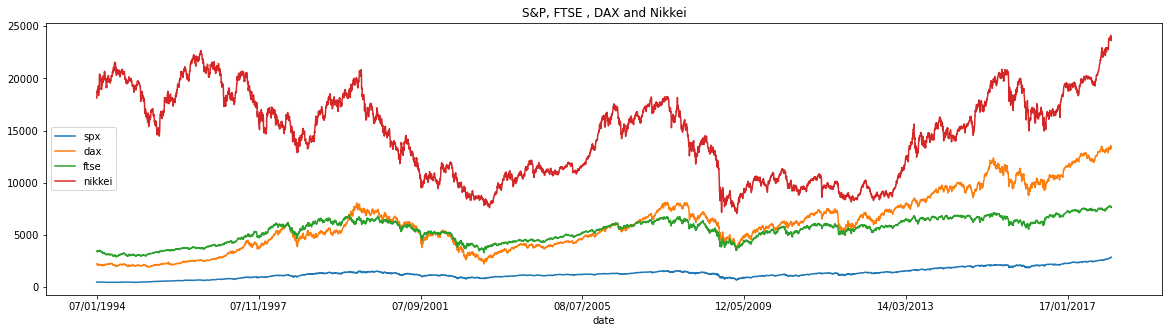

In [16]:

for col in df_comp.columns:
    df_comp[col].plot(figsize=(20,5), label=col)
    plt.title('S&P, FTSE , DAX and Nikkei')
    plt.legend();

### The QQPlot (Quantile-Quantile Plot)
Usually showcases how the data fits a Normal Distributions

In [17]:
import scipy.stats
import pylab

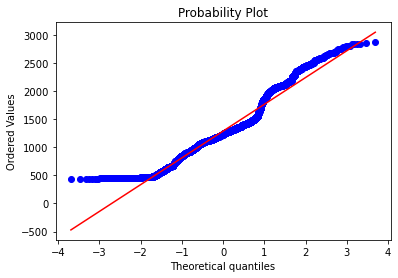

In [18]:
scipy.stats.probplot(df_comp.spx, plot=pylab);


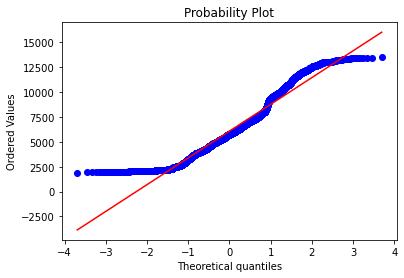

In [19]:
scipy.stats.probplot(df_comp.dax, plot=pylab);

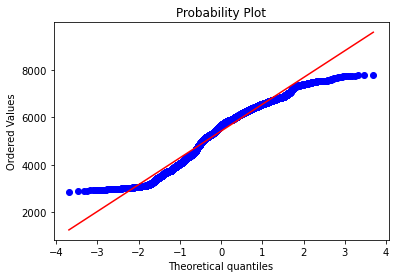

In [20]:
scipy.stats.probplot(df_comp.ftse, plot=pylab);

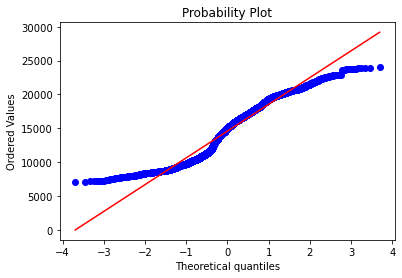

In [21]:
scipy.stats.probplot(df_comp.nikkei, plot=pylab);

The plot takes all the values a variable can take, and arranges them in accending order.

Y - prices, X , theoretical quantalite.(How many standard deviations away from the mean these values are.)

Real diagonal it's what it should follow if normal distributed. So, the data isn't normally distributed.

---

In [22]:
df_comp = df_comp.reset_index()

### From text to Date:
- Assumes we are plugging in a string in a `mm/dd/yyyy` form.

In [23]:
df_comp.date =pd.to_datetime(df_comp.date, dayfirst=True)

#### Other way to plot the graphic

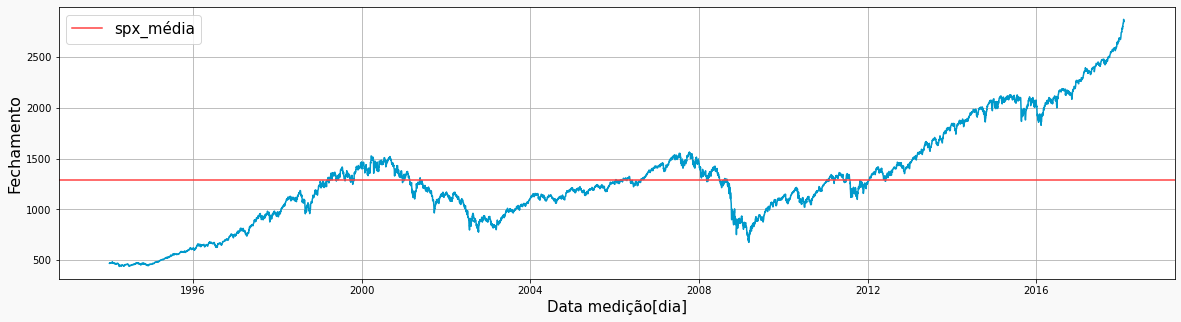

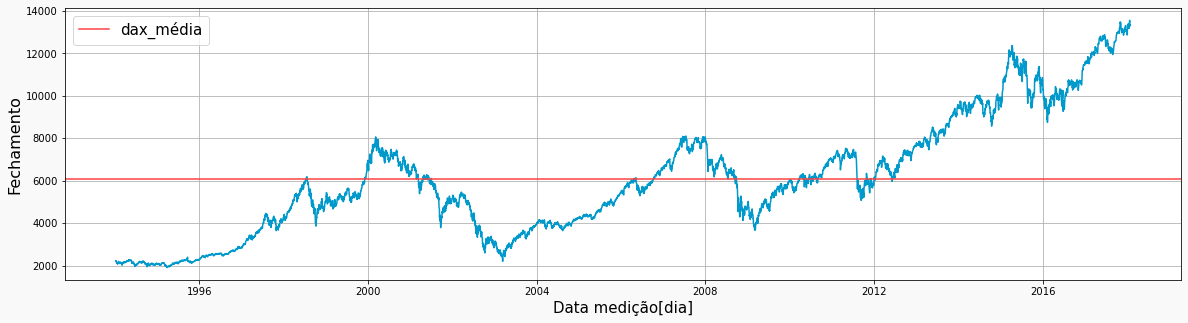

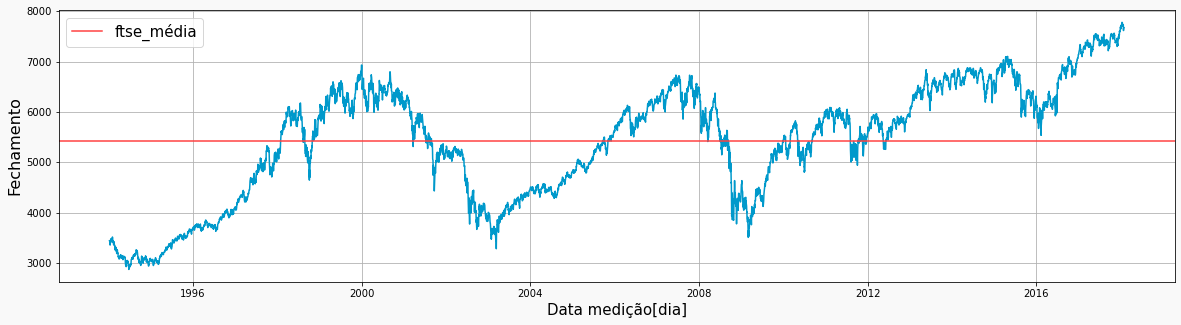

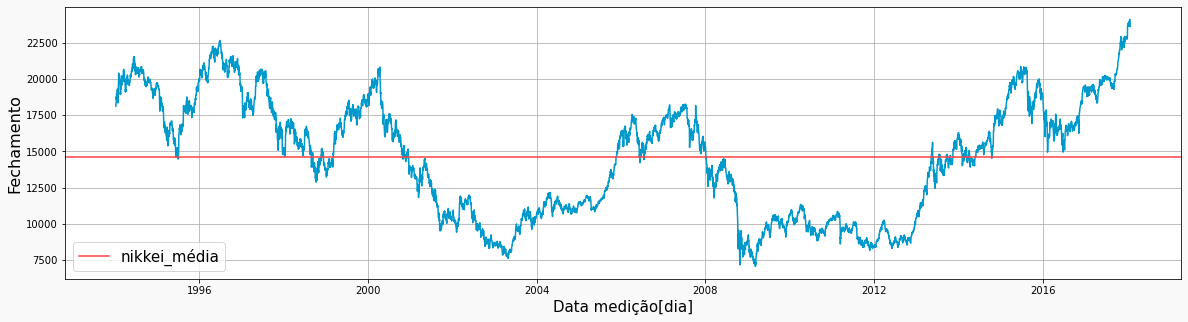

In [24]:
for col in df_comp.columns[1:]:
    
    plt.figure(facecolor='#f9f9f9',edgecolor= '#4a646c',figsize=(20,5))
    plt.plot(df_comp.date , df_comp[col],'-',color='#0099cb')#
    plt.xlabel('Data medição[dia]',fontsize= 15)
    plt.ylabel('Fechamento',fontsize=16)
    plt.axhline(df_comp[col].mean(),c = '#ff4040',label=f'{col}_média')
    plt.grid(True, 'both','both')
    #plt.xticks(df_comp.iloc[range(0,len(df_comp),1),0],rotation=90)
    plt.legend(fontsize=15);

In [25]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


#### before was:
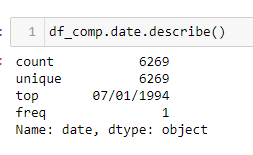

In [26]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [27]:
df_comp.date.describe(datetime_is_numeric=True)

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

## Setting the index 
- Each value should correspond to a time period.
- We often wish to examine specific chunks of data between two concrete dates.

for example: Separating the data before & after September 15th 2008

In [28]:
df_comp.set_index('date', inplace=True)

# df_comp.date.describe() won't work now. it gives an error message,because it's in the index now, and not in the dataframe

In [29]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting the Frequency 

The values the argument on the  `df.comp.asfreq()` can take are specific letters of the alphabet.

- 'h' - hourly
- 'w' - weekly
- 'd' - daily
- 'm' - monthly

Data measured once per year is 'annual', rather than 'yearly' so it's 'a'.

- 'a' - annual

In [30]:
# set As 'd'= daily, and appears some nan cause the data are on business date

df_comp = df_comp.asfreq('d')

In [31]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [32]:
# business days - avoid Saturdays and Sundays
df_comp = df_comp.asfreq('b')

In [33]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing Values

In [34]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

As the frequency was set to 'business days' generated values for which it doesn't have value. Therefore the Nan's

### method fillna() :

- <strong>1) Front filling: assigns the value of the previous period.</strong>
 
 <em>day 2 is Nan so it assigns the same value as day 1</em>
 
 
- <strong>2) Back Filling; assigns the value for the next period.</strong>
 
 <em>day 2 is Nan so it assigns the same value as day 3 </em>
 
 
- <strong>3)Assign the same value: </strong> the average to all the missing values within the TS

In [35]:
df_comp.spx = df_comp.spx.fillna(method='ffill')
df_comp.ftse = df_comp.ftse.fillna(method='bfill')
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())
df_comp.nikkei = df_comp.nikkei.fillna(method='ffill')

In [36]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [37]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [38]:
# to safe the data in you Pc
#df_comp.to_csv("df_treated.csv",index=True,date_format='%Y-%d-%m')

In [39]:
# to check the data
#pd.read_csv('df_treated.csv').info()

In [40]:
# Let's only use the ffill to fill the nan
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')


### Simplifying the Dataset

In [41]:
df_comp['market_value'] = df_comp.spx

In [42]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6083.381061,5423.679824,14597.672753,1288.642547
std,487.868210,2755.563853,1145.616719,4043.795272,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4486.730000,10701.130000,992.715221
50%,1233.761241,5774.260000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7445.560000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [43]:
del df_comp['spx']

In [44]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6083.381061,5423.679824,14597.672753,1288.642547
std,2755.563853,1145.616719,4043.795272,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4486.730000,10701.130000,992.715221
50%,5774.260000,5663.300000,15030.510000,1233.761241
75%,7445.560000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [45]:
del df_comp['dax'], df_comp['ftse'],df_comp['nikkei']

In [46]:
df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


In [47]:
#df_comp.to_csv('df_treated_simplified.csv',index=True,date_format='%Y-%d-%m')

### Splitting the Data

Shuffling is <strong>impossible</strong> in TS data.

- training set: from the beginning up to some cut off point [orange]
- testing set: from the cut off point until the end. [green]
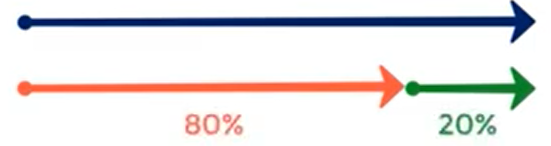

In [48]:
# perct = 0.8
# size = int(len(df_comp)*perct)
# df = df_comp.iloc[:size]
# df_test = df_comp.iloc[size:]

In [49]:
size = int(len(df_comp)*0.8)
df,df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [50]:
df.shape, df_test.shape

((5021, 1), (1256, 1))

---